In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from pandas.plotting import autocorrelation_plot
from scipy.optimize import curve_fit

La prima parte di questa esercitazione ha come scopo quello di fare due stime del valore del seguente integrale
$$
I = \int_0^1 \frac{\pi}{2}\cos(\frac{\pi x}{2}) dx = 1
$$
La prima stima è stata fatta generando numeri casuali distribuiti uniformemente nell'intervallo $[0,1]$, mentre per la seconda stima abbiamo utilizzato il metodo dell'importance sampling. 

### Esercizio 2.1.1
In questa prima parte abbiamo generato numeri casuali $x$ nell'intevallo $[0,1]$ distribuiti secondo una distribuzione uniforme. L'integrale di partenza è quindi il valor medio della funzione della variabile casuale
$$
f(x)=\frac{\pi}{2}\cos(\pi x/2)
$$
e la sua stima viene quindi fatta come media aritmetica. Mostriamo ora il risultato della simulazione. L'incertezza sulla stima dell'integrale è stata fatta mediante la tecnica dei blocchi. Mostriamo di seguito il grafico della stima dell'integrale con la relativa incertezza al variare del numero di blocchi, abbiamo utilizzato 100 blocchi con $10^5$ simulazioni per blocco.

In [9]:
db_uni=pd.read_csv('02.1/1.1', sep=' ', header=None)
Nblocchi=100
blocchi = []
for i in range(0, Nblocchi):
    blocchi.append(i)

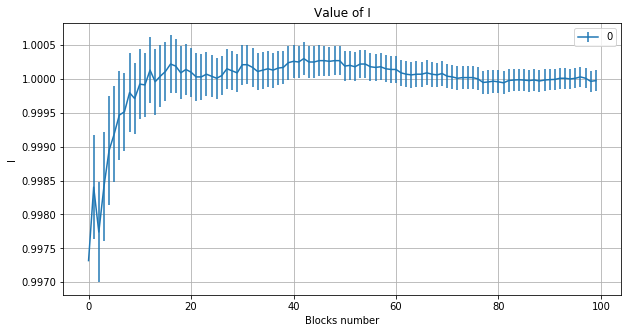

In [10]:
plt.figure(figsize = (10, 5))
plt.title("Value of I")
plt.errorbar(blocchi, db_uni.iloc[:,0], yerr=db_uni.iloc[:,1])
plt.xlabel('Blocks number')
plt.ylabel('I')
plt.grid(True)
plt.legend()

la stima del valore dell'integrale è in ottimo accordo con il valore vero.

### Esercizio 2.1.2
Nella seconda parte di questo primo esercizio abbiamo stimato il valore dell'integrale con il metodo dell'importance sampling. L'integranda è stata fattorizzata nel modo seguente:

$$
f(x)=g(x)p(x) = \frac{\frac{\pi}{2}\cos(\frac{\pi x}{2})}{2(x-1)}2(x-1)
$$

Abbiamo quindi generato i valori di $x$ in accordo con la densità di probabilità $p(x)=2(x-1)$ e abbiamo stimato l'integrale come media aritmetica di $g(x)$.

Di seguito mostriamo il grafico della stima del valore dell'integrale con le rispettive incertezze statistiche (valutate con la tecnica dei blocchi), i parametri utilizzati sono analoghi a quelli dell'esercizio 2.1.

In [11]:
db_ImpSmp=pd.read_csv('02.1/1.2', sep=' ', header=None)

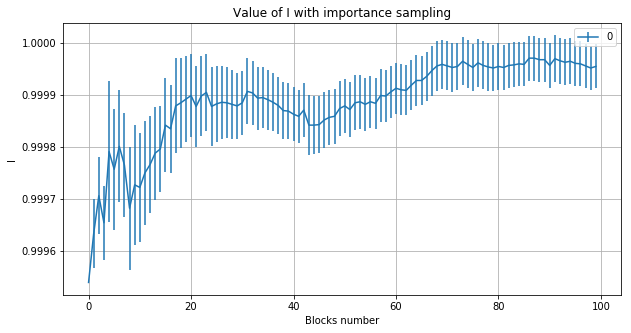

In [12]:
plt.figure(figsize = (10, 5))
plt.title("Value of I with importance sampling")
plt.errorbar(blocchi, db_ImpSmp.iloc[:,0], yerr=db_ImpSmp.iloc[:,1])
plt.xlabel('Blocks number')
plt.ylabel('I')
plt.grid(True)
plt.legend()

Anche in questo caso la stima del valore dell'integrale è in ottimo accordo con il valore vero.

###  Esercizio 2.2
Nella seconda parte di questo esercizio abbiamo simulato un random walk in due diverse condizioni. Da prima abbiamo considerato un reticolo cubico con passo reticolare $a=1$, ad ogni istante di tempo è possibile fare un passo di lunghezza $a$ in una delle tre direzioni $x,y,z$. Successivamente abbiamo simulato un random walk continuo: ad ogni passo discreto nel tempo è possibile compiere un passo di lunghezza $a$ in una qualunque direzione dello spazio. 

Per ognuna delle due configurazioni sono state fatte $10^4$ simulazioni del random walk di 100 passi. Mostriamo ora il grafico della radice quadrata della media della posizione accupata dal walker in funzione del numero di passi svolto. L'incertezza sui valori medi è stata calcolata mediante la tecnica dei blocchi, il numero totale delle simulazioni è stato diviso in 100 blocchi.

In [13]:
db_discrete=pd.read_csv('02.2/02.2.1.txt', header = None)
db_continuum= pd.read_csv('02.2/02.2.2.txt', header = None)

In [14]:
discrete=np.array(list(db_discrete.iloc[:,0]))
sigma_discrete=np.array(list(db_discrete.iloc[:,1]))
continuum=np.array(list(db_continuum.iloc[:,0]))
sigma_continuum=np.array(list(db_continuum.iloc[:,1]))
steps=[]
for i in range (1,101):
    steps.append(i)

In [15]:
def RandomWalk(N, k):
    n=np.array(N)
    return k*(n**0.5) 

p_dis, cov_dis = curve_fit(RandomWalk, steps , discrete)
p_cont, cov_cont = curve_fit(RandomWalk, steps , continuum)

ydisc=RandomWalk(steps , p_dis[0])
ycont=RandomWalk(steps , p_cont[0])

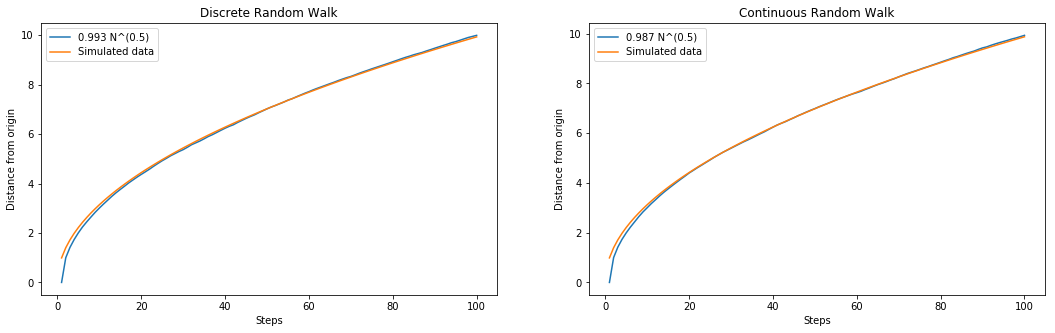

In [16]:
fig, axs = plt.subplots(1, 2, figsize = (18, 5))
axs[0].plot(steps, discrete)    #discrete 
axs[0].plot(steps, ydisc)
axs[0].set_title('Discrete Random Walk')
axs[0].set(xlabel='Steps', ylabel='Distance from origin')
#axs[0].set_xlim((-100, 1000))
axs[0].legend(['0.993 N^(0.5)', 'Simulated data'])

axs[1].plot(steps, continuum)    #continuum
axs[1].plot(steps, ycont)
axs[1].set_title('Continuous Random Walk')
axs[1].set(xlabel='Steps', ylabel='Distance from origin')
#axs[1].set_xlim((-100, 1000))
axs[1].legend(['0.987 N^(0.5)', 'Simulated data'])

